In [109]:
!pip install spotipy

import os
from dotenv import load_dotenv
import pprint
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


load_dotenv()

CLIENT_ID = os.getenv("CLIENT_ID")
CLIENT_SECRET = os.getenv("CLIENT_SECRET")

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
                                                           client_secret=CLIENT_SECRET))



In [110]:
def get_track_details(name_string,sp=sp):

    result= sp.search(q=f'{name_string}', limit=1)
    track=result['tracks']['items'][0]

    return {
        'id': track['id'],
        'name': track['name'],
        'album': track['album']['name'],
        'popularity': track['popularity'],
        'artists': [artist['name'] for artist in track['artists']],
        'release_date': track['album']['release_date'],
    }

def get_track_genre(id,sp=sp):

    result= sp.audio_features(id)[0]
    return {
        'danceability': result['danceability'],
        'energy':result['energy'],
        'key': result['key'],
        'loudness': result['loudness'],
        'mode': result['mode'],
        'speechiness':result['speechiness'],
        'acousticness': result['acousticness'],
        'instrumentalness': result['instrumentalness'],
        'liveness': result['liveness'],
        'valence': result['valence'],
        'tempo': result['tempo'],
    }

 

def get_audio_analysis(id,sp=sp):

    result = sp.audio_analysis(id)['track']
#  'start_of_fade_out': 171.68254,
#  'tempo': 173.988,
#  'tempo_confidence': 0.125,
#  'key': 8,
#  'key_confidence': 0.413,
#  'mode': 1,
#  'mode_confidence': 0.512,
    return {'duration': result['duration']}


In [111]:
def create_multiple_tracks_df(songs_list):
    # Lista para almacenar la información de cada canción como un diccionario
    track_info_list = [] 

    for song in songs_list:
        try:
            # Obtenemos la info de la canción
            track_details = get_track_details(song)
            id = track_details['id']  # id de la canción que usamos para analysis
            
            # Llamamos a las funciones de genre y analysis
            track_genre = get_track_genre(id)
            audio_analysis = get_audio_analysis(id)
            
            # Combinamos toda la info en un sólo diccionario
            track_info_dict = {
                'name': track_details['name'],
                'album': track_details['album'],
                'popularity': track_details['popularity'],
                'artists': ', '.join(track_details['artists']),
                'colab': ("Y" if len(track_details['artists']) > 1 else "N"),
                'release_date': track_details['release_date'],
                'danceability': track_genre['danceability'],
                'energy': track_genre['energy'],
                'key': track_genre['key'],
                'loudness': track_genre['loudness'],
                'mode': track_genre['mode'],
                'speechiness': track_genre['speechiness'],
                'acousticness': track_genre['acousticness'],
                'instrumentalness': track_genre['instrumentalness'],
                'liveness': track_genre['liveness'],
                'valence': track_genre['valence'],
                'tempo': track_genre['tempo'],
                'duration ms': audio_analysis['duration'],
            }
            
            # Añadir el diccionario a la lista
            track_info_list.append(track_info_dict)

            
        except Exception as e:
            print(f"Error obteniendo detalles para '{song}': {e}")
    
    # Convertir la lista de diccionarios en un DataFrame
    return pd.DataFrame(track_info_list)





songs_list = [

    # 1960
    "Elvis Presley - It's Now or Never",
    "The Platters - Smoke Gets in Your Eyes",
    "Chubby Checker - The Twist",
    "Percy Faith - Theme from A Summer Place",
    "The Drifters - Save the Last Dance for Me",

    # 1961
    "The Tokens - The Lion Sleeps Tonight",
    "Percy Faith - Theme from A Summer Place",
    "Bobby Vee - Take Good Care of My Baby",
    "Pat Boone - Moody River",
    "Del Shannon - Runaway",

    # 1962
    "Chubby Checker - The Twist",
    "Gary U.S. Bonds - Quarter to Three",
    "Elvis Presley - Good Luck Charm",
    "The Tornados - Telstar",
    "The Four Seasons - Sherry",

    # 1963
    "The Singing Nun - Dominique",
    "The Four Seasons - Walk Like a Man",
    "Jan and Dean - Surf City",
    "The Beach Boys - Be True to Your School",
    "Lesley Gore - It's My Party",

    # 1964
    "The Beatles - I Want to Hold Your Hand",
    "The Beatles - She Loves You",
    "The Beatles - Can't Buy Me Love",
    "The Beach Boys - I Get Around",
    "Diana Ross & The Supremes - Where Did Our Love Go",

    # 1965
    "The Byrds - Mr. Tambourine Man",
    "The Beatles - Help!",
    "The Rolling Stones - (I Can't Get No) Satisfaction",
    "The Four Tops - I Can't Help Myself (Sugar Pie, Honey Bunch)",
    "The Beach Boys - California Girls",

    # 1966
    "The Beatles - Paperback Writer",
    "The Beach Boys - Good Vibrations",
    "The Troggs - Wild Thing",
    "The Supremes - You Can't Hurry Love",
    "Simon & Garfunkel - The Sound of Silence",

    # 1967
    "The Beatles - Penny Lane",
    "The Beatles - Strawberry Fields Forever",
    "The Monkees - I'm a Believer",
    "The Doors - Light My Fire",
    "The Association - Windy",

    # 1968
    "The Beatles - Hey Jude",
    "The Box Tops - The Letter",
    "Aretha Franklin - Respect",
    "Steppenwolf - Born to Be Wild",
    "The Rascals - Good Lovin'",

    # 1969
    "The Archies - Sugar, Sugar",
    "The Beatles - Come Together",
    "The Rolling Stones - Honky Tonk Women",
    "Tommy James and the Shondells - Crystal Blue Persuasion",
    "Three Dog Night - One",

    # 1970
    "Simon & Garfunkel - Bridge Over Troubled Water",
    "The Beatles - Let It Be",
    "The Jackson 5 - I Want You Back",
    "B. J. Thomas - Raindrops Keep Fallin' on My Head",
    "The Partridge Family - I Think I Love You",

    # 1971
    "George Harrison - My Sweet Lord",
    "John Lennon - Imagine",
    "Don McLean - American Pie",
    "Carpenters - (They Long to Be) Close to You",
    "Tony Orlando and Dawn - Knock Three Times",

    # 1972
    "Hot Butter - Popcorn",
    "Bill Withers - Lean on Me",
    "The Rolling Stones - Tumbling Dice",
    "Roberta Flack - The First Time Ever I Saw Your Face",
    "Johnny Nash - I Can See Clearly Now",

    # 1973
    "Edwin Starr - War",
    "Tony Orlando and Dawn - Tie a Yellow Ribbon Round the Ole Oak Tree",
    "The Rolling Stones - Angie",
    "Gladys Knight & The Pips - Midnight Train to Georgia",
    "Cher - Half-Breed",

    # 1974
    "Ray Stevens - The Streak",
    "Carl Douglas - Kung Fu Fighting",
    "Abba - Waterloo",
    "The Bay City Rollers - Saturday Night",
    "John Denver - Sunshine on My Shoulders",

    # 1975
    "Queen - Bohemian Rhapsody",
    "The Eagles - One of These Nights",
    "Whitney Houston - I Will Always Love You",
    "David Bowie - Fame",
    "ABBA - Mamma Mia",

    # 1976
    "ABBA - Dancing Queen",
    "Elvis Presley - Moody Blue",
    "Rod Stewart - Tonight's the Night (Gonna Be Alright)",
    "The Four Seasons - December, 1963 (Oh, What a Night)",
    "Paul Simon - 50 Ways to Leave Your Lover",

    # 1977
    "Bee Gees - Stayin' Alive",
    "Fleetwood Mac - Dreams",
    "The Eagles - Hotel California",
    "Elvis Presley - Way Down",
    "ABBA - Knowing Me, Knowing You",

    # 1978
    "Chic - Le Freak",
    "Bee Gees - How Deep Is Your Love",
    "The Village People - Macho Man",
    "John Travolta & Olivia Newton-John - You're the One That I Want",
    "Nick Gilder - Hot Child in the City",

    # 1979
    "Pink Floyd - Another Brick in the Wall",
    "The Knack - My Sharona",
    "Blondie - Heart of Glass",
    "The Village People - YMCA",
    "Donna Summer - Bad Girls",

    # 1980
    "Queen - Another One Bites the Dust",
    "Blondie - Call Me",
    "Michael Jackson - Rock with You",
    "Olivia Newton-John - Magic",
    "KC and the Sunshine Band - Give It Up",

    # 1981
    "Rick Springfield - Jessie's Girl",
    "Diana Ross - Endless Love",
    "Kim Carnes - Bette Davis Eyes",
    "Sheena Easton - Morning Train (Nine to Five)",
    "The Human League - Don't You Want Me",

    # 1982
    "Michael Jackson - Billie Jean",
    "Toto - Africa",
    "Men at Work - Down Under",
    "The Police - Every Little Thing She Does Is Magic",
    "John Cougar - Jack and Diane",

    # 1983
    "Michael Jackson - Beat It",
    "The Police - Every Breath You Take",
    "David Bowie - Let's Dance",
    "Culture Club - Karma Chameleon",
    "Eurythmics - Sweet Dreams (Are Made of This)",

    # 1984
    "Prince - When Doves Cry",
    "Michael Jackson - Thriller",
    "Madonna - Like a Virgin",
    "Bruce Springsteen - Dancing in the Dark",
    "Huey Lewis and the News - The Heart of Rock & Roll",

    # 1985
    "USA for Africa - We Are the World",
    "Madonna - Material Girl",
    "Phil Collins - One More Night",
    "Dire Straits - Money for Nothing",
    "Tears for Fears - Shout",

    # 1986
    "Bon Jovi - Livin' on a Prayer",
    "Wang Chung - Everybody Have Fun Tonight",
    "George Michael - Careless Whisper",
    "Peter Gabriel - Sledgehammer",
    "Heart - These Dreams",

    # 1987
    "Whitney Houston - I Wanna Dance with Somebody",
    "U2 - With or Without You",
    "Michael Jackson - Bad",
    "R.E.M. - The One I Love",
    "Pat Benatar - Love Is a Battlefield",

    # 1988
    "George Michael - Father Figure",
    "Bobby Brown - My Prerogative",
    "Cyndi Lauper - Together Again",
    "Rick Astley - Never Gonna Give You Up",
    "Tiffany - I Think We're Alone Now",

    # 1989
    "Madonna - Like a Prayer",
    "Janet Jackson - Miss You Much",
    "Phil Collins - Another Day in Paradise",
    "The B-52's - Love Shack",
    "Roxette - The Look",

    # 1990
    "MC Hammer - U Can't Touch This",
    "Mariah Carey - Vision of Love",
    "Sinead O'Connor - Nothing Compares 2 U",
    "Wilson Phillips - Hold On",
    "Janet Jackson - Escapade",

    # 1991
    "Bryan Adams - (Everything I Do) I Do It for You",
    "Nirvana - Smells Like Teen Spirit",
    "R.E.M. - Losing My Religion",
    "Salt-N-Pepa - Shoop",
    "Color Me Badd - I Wanna Sex You Up",

    # 1992
    "Vanessa Williams - Save the Best for Last",
    "Sir Mix-a-Lot - Baby Got Back",
    "Whitney Houston - I'm Every Woman",
    "Eric Clapton - Tears in Heaven",
    "Criss Cross - Jump",

    # 1993
    "Billy Joel - River of Dreams",
    "Whitney Houston - I Will Always Love You",
    "4 Non Blondes - What's Up?",
    "Meat Loaf - I'd Do Anything for Love (But I Won't Do That)",
    "Janet Jackson - That's the Way Love Goes",

    # 1994
    "Ace of Base - The Sign",
    "All-4-One - I Swear",
    "Lisa Loeb - Stay (I Missed You)",
    "Mariah Carey - Without You",
    "Salt-N-Pepa - Shoop",

    # 1995
    "TLC - Waterfalls",
    "Coolio - Gangsta's Paradise",
    "Mariah Carey - Fantasy",
    "Hootie & the Blowfish - Only Wanna Be with You",
    "Alanis Morissette - You Oughta Know",

    # 1996
    "Spice Girls - Wannabe",
    "Celine Dion - Because You Loved Me",
    "TLC - No Scrubs",
    "Los Del Rio - Macarena",
    "Alan Rickman - You Oughta Know",

    # 1997
    "Elton John - Candle in the Wind 1997",
    "Hanson - MMMBop",
    "The Notorious B.I.G. - Mo Money Mo Problems",
    "Matchbox Twenty - Push",
    "Puff Daddy - I'll Be Missing You",

    # 1998
    "Aqua - Barbie Girl",
    "Brandy & Monica - The Boy Is Mine",
    "Usher - You Make Me Wanna...",
    "Will Smith - Gettin' Jiggy wit It",
    "Celine Dion - My Heart Will Go On",

    # 1999
    "Ricky Martin - Livin' la Vida Loca",
    "Britney Spears - ...Baby One More Time",
    "Santana - Smooth",
    "Jennifer Lopez - If You Had My Love",
    "Backstreet Boys - I Want It That Way",

    # 2000
    "Destiny's Child - Say My Name",
    "NSYNC - Bye Bye Bye",
    "Eminem - The Real Slim Shady",
    "Britney Spears - Oops!... I Did It Again",
    "Santana featuring Rob Thomas - Smooth",

    # 2001
    "Alicia Keys - Fallin'",
    "Usher - U Remind Me",
    "Shaggy - It Wasn't Me",
    "Ja Rule - Always On Time",
    "Linkin Park - In the End",

    # 2002
    "Eminem - Lose Yourself",
    "Ashanti - Foolish",
    "Nelly - Hot in Herre",
    "Usher - U Got It Bad",
    "Mary J. Blige - No More Drama",

    # 2003
    "50 Cent - In Da Club",
    "Evanescence - Bring Me to Life",
    "Beyoncé - Crazy In Love",
    "Sean Paul - Get Busy",
    "Kelly Clarkson - Miss Independent",

    # 2004
    "Usher - Yeah!",
    "Alicia Keys - If I Ain't Got You",
    "Maroon 5 - This Love",
    "Kanye West - Jesus Walks",
    "OutKast - Hey Ya!",

    # 2005
    "Mariah Carey - We Belong Together",
    "Gwen Stefani - Hollaback Girl",
    "Kanye West - Gold Digger",
    "50 Cent - Candy Shop",
    "The Black Eyed Peas - My Humps",

    # 2006
    "Shakira - Hips Don't Lie",
    "Nelly Furtado - Promiscuous",
    "Rihanna - SOS",
    "T-Pain - Buy U a Drank (Shawty Snappin')",
    "Daniel Powter - Bad Day",

    # 2007
    "Rihanna - Umbrella",
    "T-Pain - Bartender",
    "Fergie - Big Girls Don't Cry",
    "Kanye West - Stronger",
    "Beyoncé - Irreplaceable",

    # 2008
    "Lil Wayne - Lollipop",
    "Akon - Smack That",
    "Katy Perry - I Kissed a Girl",
    "T.I. - Whatever You Like",
    "Usher - Love in This Club",

    # 2009
    "Black Eyed Peas - I Gotta Feeling",
    "Lady Gaga - Poker Face",
    "Kanye West - Heartless",
    "T-Pain - Buy U a Drank",
    "Beyoncé - Single Ladies (Put a Ring on It)",

    # 2010
    "Katy Perry - California Gurls",
    "Usher - OMG",
    "Lady Gaga - Bad Romance",
    "B.o.B - Nothin' on You",
    "Rihanna - Rude Boy",

    # 2011
    "Adele - Rolling in the Deep",
    "LMFAO - Party Rock Anthem",
    "Katy Perry - Firework",
    "Bruno Mars - Grenade",
    "Rihanna - We Found Love",

    # 2012
    "Carly Rae Jepsen - Call Me Maybe",
    "Gotye - Somebody That I Used to Know",
    "Fun. - We Are Young",
    "Rihanna - Diamonds",
    "PSY - Gangnam Style",

    # 2013
    "Robin Thicke - Blurred Lines",
    "Macklemore & Ryan Lewis - Thrift Shop",
    "Daft Punk - Get Lucky",
    "Katy Perry - Roar",
    "Lorde - Royals",

    # 2014
    "Pharrell Williams - Happy",
    "John Legend - All of Me",
    "Iggy Azalea - Fancy",
    "Maroon 5 - Maps",
    "Taylor Swift - Shake It Off",

    # 2015
    "Ed Sheeran - Thinking Out Loud",
    "Mark Ronson ft. Bruno Mars - Uptown Funk",
    "The Weeknd - Can't Feel My Face",
    "Taylor Swift - Blank Space",
    "Justin Bieber - Sorry",

    # 2016
    "Drake - One Dance",
    "Rihanna - Work",
    "Justin Bieber - Love Yourself",
    "Sia - Cheap Thrills",
    "The Chainsmokers ft. Halsey - Closer",

    # 2017
    "Ed Sheeran - Shape of You",
    "Luis Fonsi & Daddy Yankee - Despacito",
    "Bruno Mars - That's What I Like",
    "Kendrick Lamar - Humble.",
    "Dua Lipa - New Rules",

    # 2018
    "Drake - God's Plan",
    "Bebe Rexha - Meant to Be",
    "Post Malone - Rockstar",
    "Ed Sheeran - Perfect",
    "Cardi B - I Like It",

    # 2019
    "Billie Eilish - Bad Guy",
    "Lil Nas X - Old Town Road",
    "Ariana Grande - 7 Rings",
    "Halsey - Without Me",
    "Post Malone - Sunflower",

    # 2020
    "The Weeknd - Blinding Lights",
    "Roddy Ricch - The Box",
    "Dua Lipa - Don't Start Now",
    "Harry Styles - Watermelon Sugar",
    "BTS - Dynamite",

    # 2021
    "Olivia Rodrigo - Drivers License",
    "The Weeknd - Save Your Tears",
    "Dua Lipa - Levitating",
    "Silk Sonic - Leave the Door Open",
    "BTS - Butter",

    # 2022
    "Harry Styles - As It Was",
    "Beyoncé - Break My Soul",
    "Bad Bunny - Tití Me Preguntó",
    "Steve Lacy - Bad Habit",
    "Drake - Jimmy Cooks",

    # 2023
    "SZA - Kill Bill",
    "Taylor Swift - Anti-Hero",
    "The Weeknd - Heartless",
    "Post Malone - Chemical",
    "Olivia Rodrigo - Vampire",

    # 2024
    "Olivia Rodrigo - Good 4 U",
    "Dua Lipa - Dance the Night",
    "The Weeknd - Save Your Tears",
    "SZA - SOS",
    "Drake - Rich Flex"


]

df = create_multiple_tracks_df(songs_list)
df


,name,album,popularity,artists,colab,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration ms
0,It's Now or Never,Platinum - A Life In Music,58,Elvis Presley,N,1997-07-15,0.633,0.365,4,-14.940,1,0.0403,0.4280,0.003780,0.5690,0.743,126.266,193.90668
1,Smoke Gets In Your Eyes,Remember When?,64,The Platters,N,1959-01-01,0.203,0.295,3,-11.155,1,0.0323,0.9200,0.000002,0.1730,0.285,171.222,160.93333
2,The Twist,Dancin' Party: The Chubby Checker Collection (...,61,Chubby Checker,N,2020-06-19,0.571,0.618,4,-5.682,1,0.0371,0.1800,0.000003,0.1780,0.852,156.892,155.04000
3,"The Theme from ""A Summer Place""",16 Most Requested Songs,61,Percy Faith & His Orchestra,N,1989-06-13,0.326,0.326,0,-15.144,1,0.0297,0.5910,0.918000,0.4940,0.870,186.232,142.69333
4,Save the Last Dance for Me,Save the Last Dance for Me,63,The Drifters,N,1962,0.540,0.530,4,-10.583,1,0.0361,0.6140,0.000000,0.1980,0.896,143.453,154.96000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,good 4 u,SOUR,83,Olivia Rodrigo,N,2021-05-21,0.563,0.664,9,-5.044,1,0.1540,0.3350,0.000000,0.0849,0.688,166.928,178.14667
321,Dance The Night - From Barbie The Album,Dance The Night (From Barbie The Album),83,Dua Lipa,N,2023-05-25,0.671,0.845,11,-4.930,0,0.0480,0.0207,0.000000,0.3290,0.775,110.056,176.57932
322,Save Your Tears,After Hours,85,The Weeknd,N,2020-03-20,0.679,0.825,0,-5.487,1,0.0309,0.0212,0.000012,0.5430,0.644,118.049,215.62666
323,Snooze,SOS,86,SZA,N,2022-12-09,0.559,0.551,5,-7.231,1,0.1320,0.1410,0.000000,0.1100,0.392,143.008,201.80000


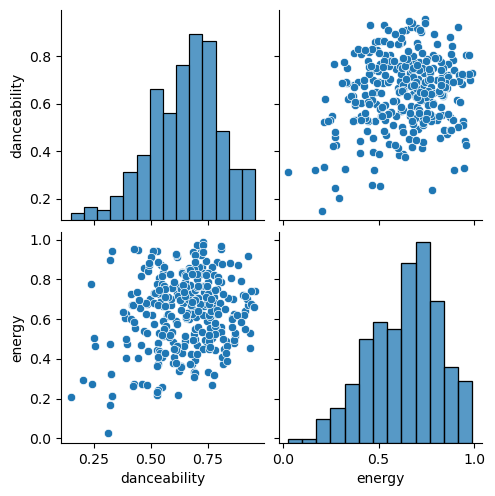

In [112]:
explore_df=df[['danceability','energy']]
sns.pairplot(explore_df)
plt.show()

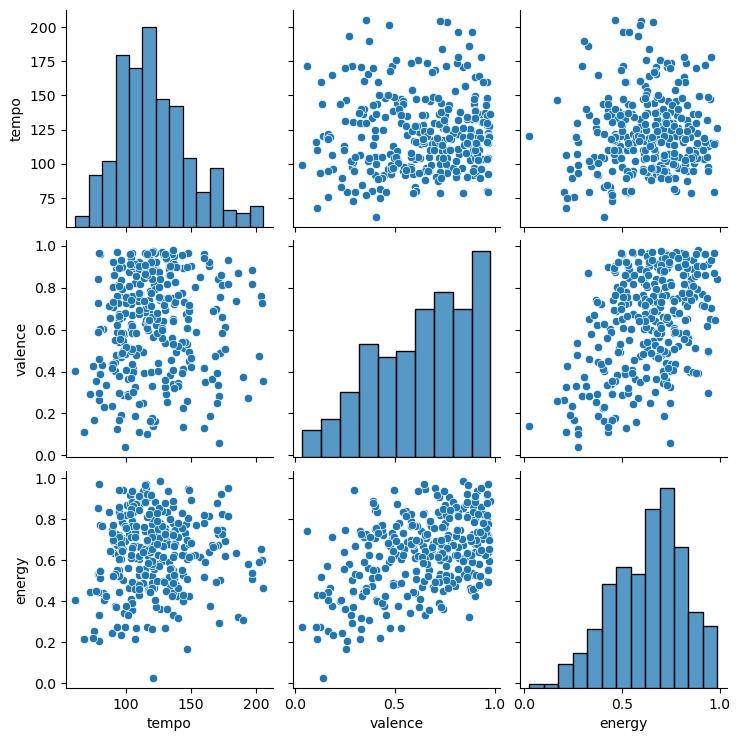

In [113]:
explore_df=df[['tempo','valence', 'energy']]
sns.pairplot(explore_df)
plt.show()

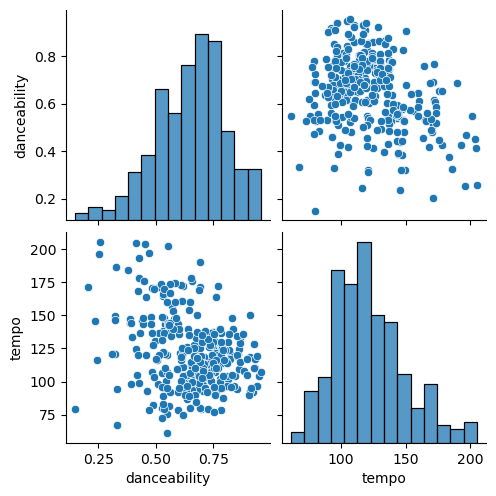

In [114]:
explore_df=df[['danceability','tempo']]
sns.pairplot(explore_df)
plt.show()


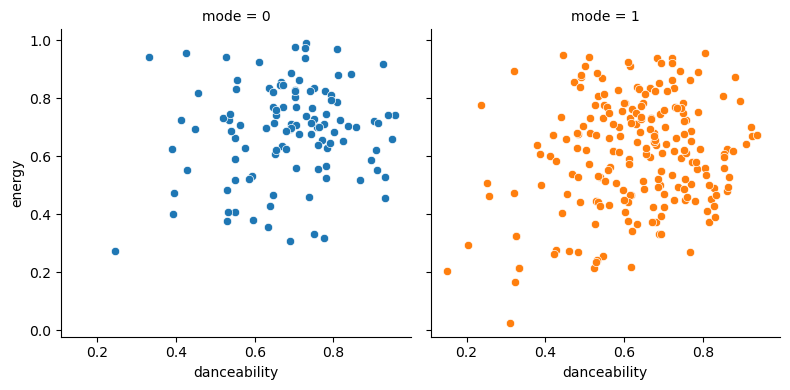

In [115]:
g = sns.FacetGrid(df, col='mode', hue='mode', height=4, aspect=1)
g.map(sns.scatterplot, 'danceability', 'energy')
plt.show()

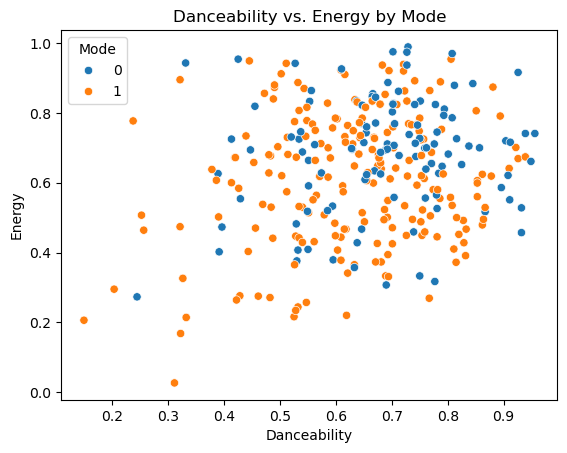

In [116]:
sns.scatterplot(x='danceability', y='energy', hue='mode', data=df)
plt.title('Danceability vs. Energy by Mode')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend(title='Mode')
plt.show()

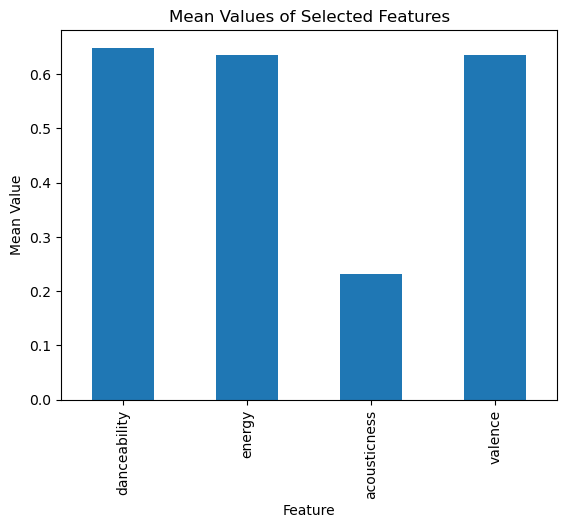

In [117]:
# Calcular la media de algunas columnas
mean_values = df[['danceability', 'energy', 'acousticness', 'valence']].mean()

# Crear un gráfico de barras
mean_values.plot(kind='bar')
plt.title('Mean Values of Selected Features')
plt.xlabel('Feature')
plt.ylabel('Mean Value')
plt.show()

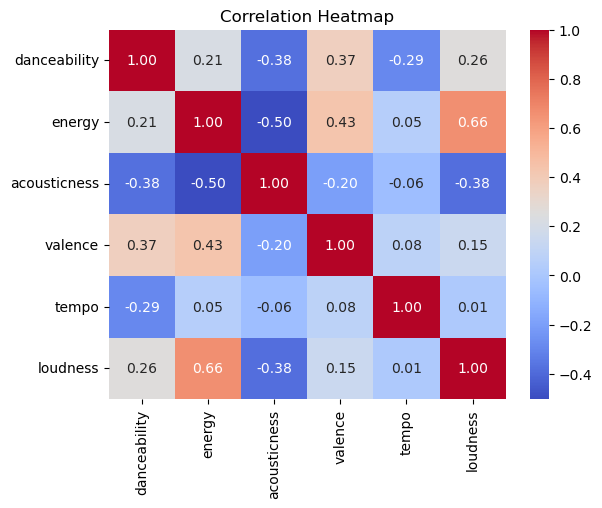

In [118]:
# Calcular la matriz de correlación
corr = df[['danceability', 'energy', 'acousticness', 'valence', 'tempo', 'loudness']].corr()

# Crear el heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

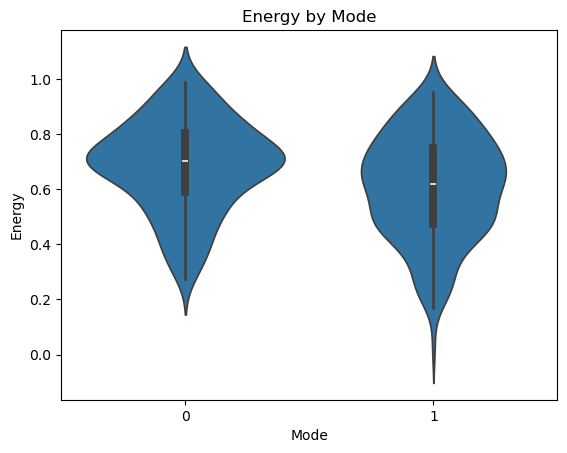

In [119]:
sns.violinplot(x='mode', y='energy', data=df)
plt.title('Energy by Mode')
plt.xlabel('Mode')
plt.ylabel('Energy')
plt.show()

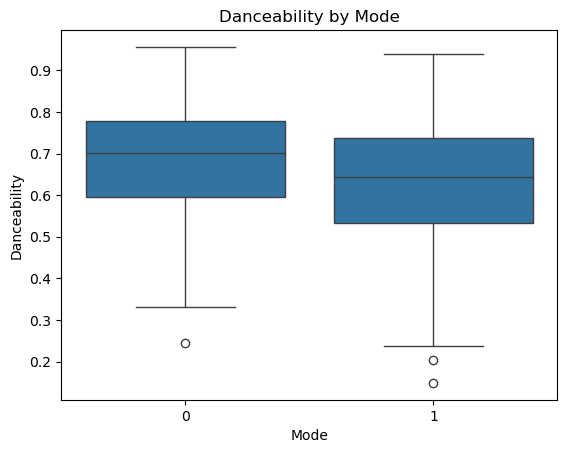

In [120]:
# Ejemplo si tuvieras una variable categórica como 'mode'
sns.boxplot(x='mode', y='danceability', data=df)
plt.title('Danceability by Mode')
plt.xlabel('Mode')
plt.ylabel('Danceability')
plt.show()

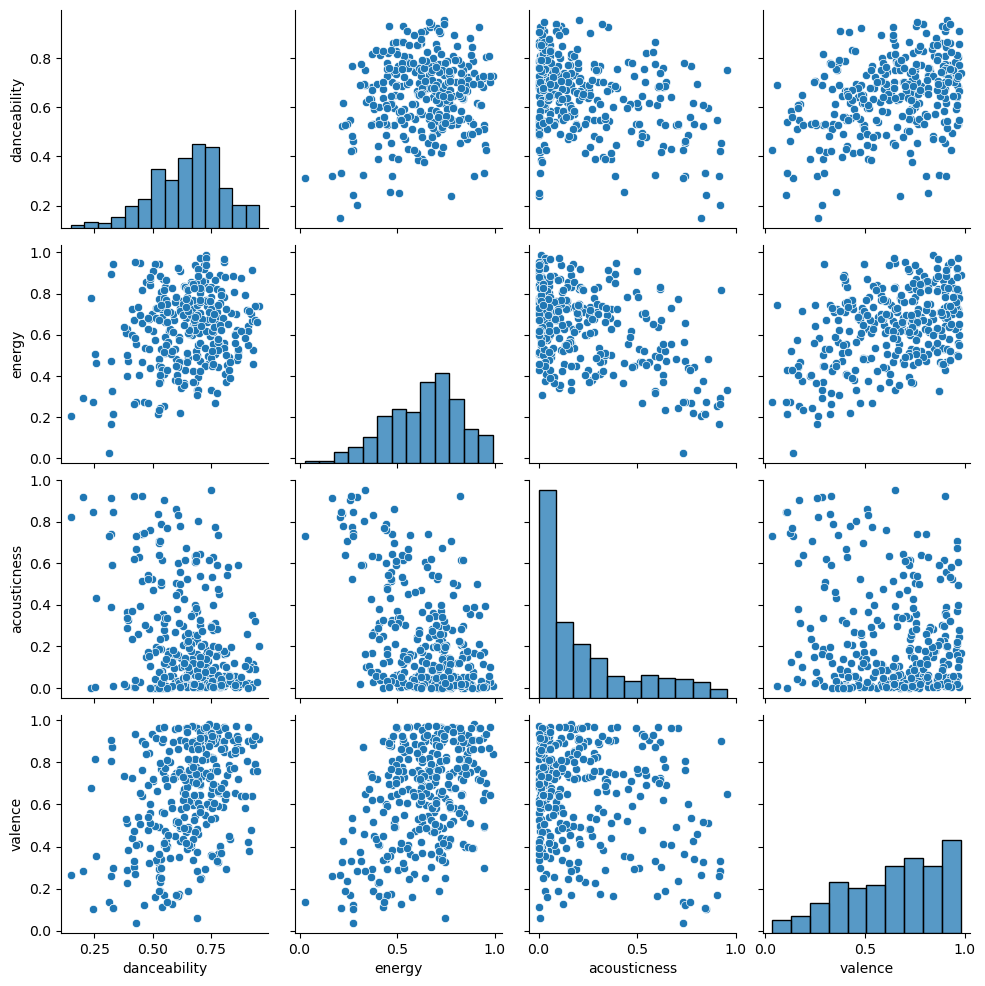

In [121]:
columns = ['danceability', 'energy', 'acousticness', 'valence']
sns.pairplot(df[columns])
plt.show()

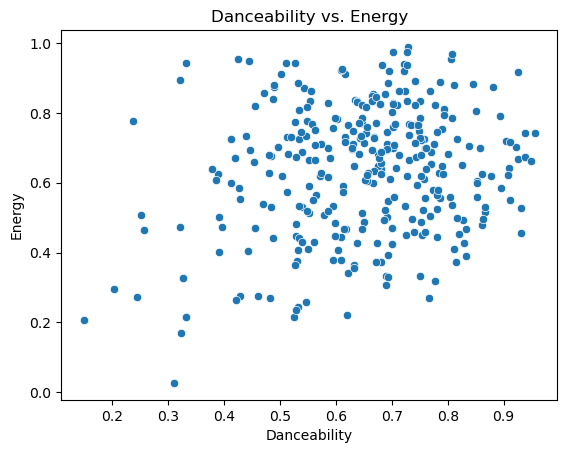

In [122]:
# Ejemplo de gráfico de dispersión entre 'danceability' y 'energy'
sns.scatterplot(x='danceability', y='energy', data=df)
plt.title('Danceability vs. Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

/var/folders/b7/hph07_m53vv3yzmmfgf8b7fm0000gn/T/ipykernel_17661/2924876379.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['release_date'].dt.year


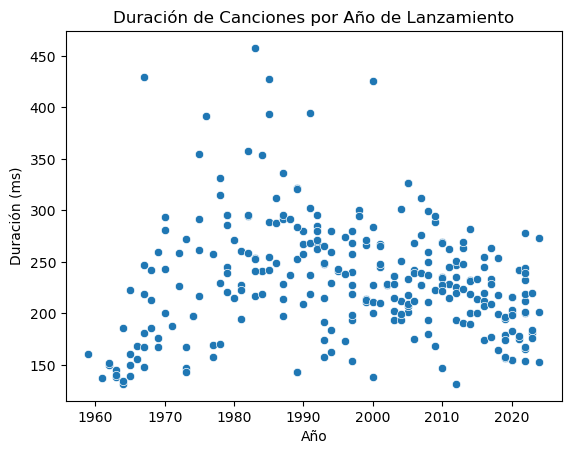

In [123]:
# Convertir la columna de fecha a tipo datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

date_formats = ['%Y-%m-%d']  

# Función para intentar diferentes formatos
def parse_dates(date_str):
    for fmt in date_formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT

# Aplicar la función a la columna
df['release_date'] = df['release_date'].apply(parse_dates)

def parse_years(date_str):
    if pd.to_datetime(date_str, format='%Y', errors='coerce') is not pd.NaT:
        return pd.to_datetime(date_str, format='%Y').replace(month=1, day=1)
    return pd.NaT

# Aplicar la función a la columna
df['release_date'] = df['release_date'].apply(lambda x: parse_years(x) if pd.isna(pd.to_datetime(x, errors='coerce')) else pd.to_datetime(x, errors='coerce'))

df = df.dropna(subset=['release_date'])

df['year'] = df['release_date'].dt.year
sns.scatterplot(x='year', y='duration ms', data=df)
plt.title('Duración de Canciones por Año de Lanzamiento')
plt.xlabel('Año')
plt.ylabel('Duración (ms)')
plt.show()

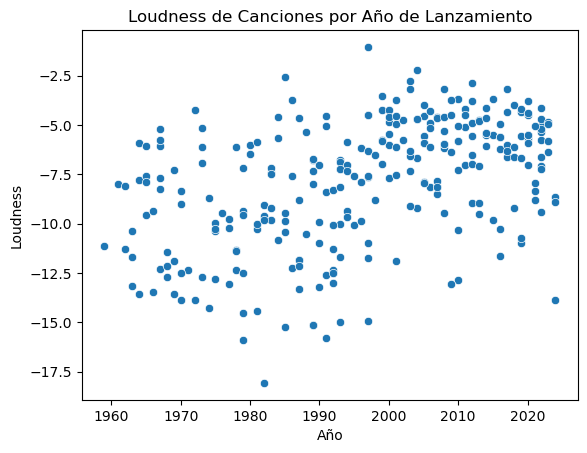

In [124]:

sns.scatterplot(x='year', y='loudness', data=df)
plt.title('Loudness de Canciones por Año de Lanzamiento')
plt.xlabel('Año')
plt.ylabel('Loudness')
plt.show()

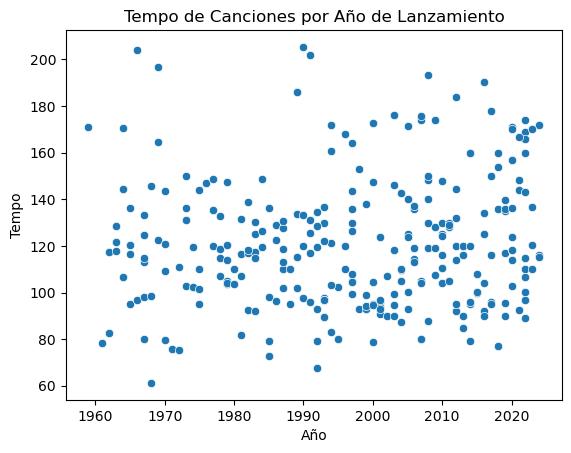

In [125]:

sns.scatterplot(x='year', y='tempo', data=df)
plt.title('Tempo de Canciones por Año de Lanzamiento')
plt.xlabel('Año')
plt.ylabel('Tempo')
plt.show()

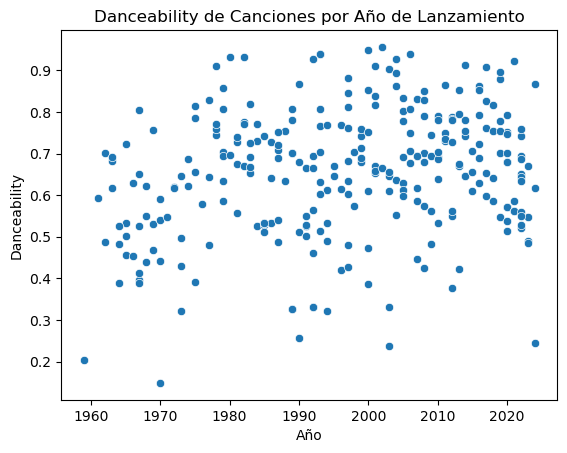

In [126]:
sns.scatterplot(x='year', y='danceability', data=df)
plt.title('Danceability de Canciones por Año de Lanzamiento')
plt.xlabel('Año')
plt.ylabel('Danceability')
plt.show()

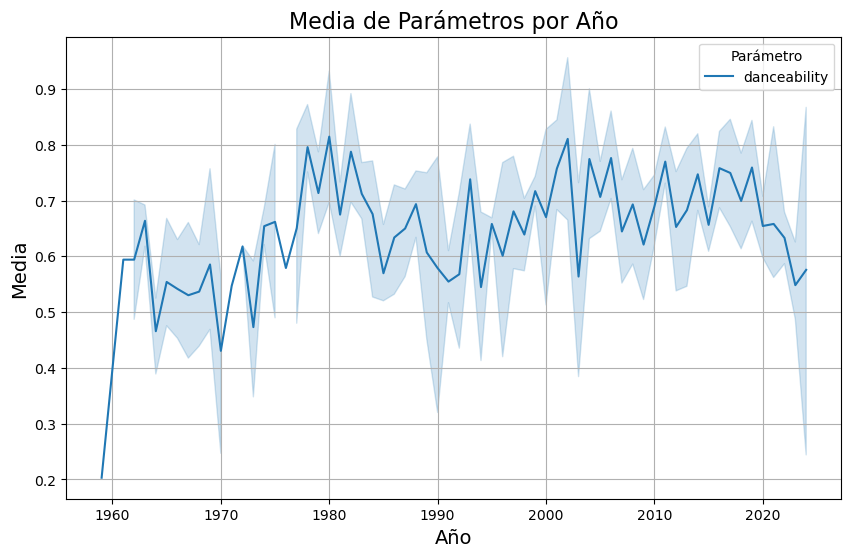

In [127]:

def plot_media_por_año(df, parametros, year_column='year', figsize=(10,6)):
    """
    Crea una gráfica de líneas para la media de los parámetros por año.
    
    Parámetros:
    - df: DataFrame que contiene los datos agrupados por año
    - parametros: Lista de parámetros a graficar
    - year_column: Nombre de la columna que contiene el año
    - figsize: Tamaño de la figura
    """
    plt.figure(figsize=figsize)
    
    # Graficar cada parámetro
    for parametro in parametros:
        sns.lineplot(x=year_column, y=parametro, data=df, label=parametro)
    
    # Configurar la gráfica
    plt.title('Media de Parámetros por Año', fontsize=16)
    plt.xlabel('Año', fontsize=14)
    plt.ylabel('Media', fontsize=14)
    plt.legend(title="Parámetro")
    plt.grid(True)
    
    # Mostrar la gráfica
    plt.show()


plot_media_por_año(df, parametros=['danceability'])
